# Parkinsons Telemonitoring

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.4.0 of ehrapy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data -O parkinsons_telemonitoring.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.names -O parkinsons_telemonitoring.names

File 'parkinsons_telemonitoring.data' already there; not retrieving.
File 'parkinsons_telemonitoring.names' already there; not retrieving.


# Data Wrangling

In [4]:
data = pd.read_csv("parkinsons_telemonitoring.data", sep=",")

Since the dataset does not have a measurement ID we add one.

In [5]:
data["measurement_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("measurement_id", inplace=True)

In [7]:
data.to_csv("parkinsons_telemonitoring_prepared.csv")

## ehrapy sanity check

In [8]:
columns_obs_only=["subject#", "test_time"]

In [9]:
adata = ep.io.read_csv("parkinsons_telemonitoring_prepared.csv",
                   index_column="measurement_id",
                   columns_obs_only=columns_obs_only
                   )

2023-01-18 19:11:52,812 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `5875` x `20`.


In [10]:
adata=ep.pp.encode(adata,autodetect=True)

Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.

2023-01-18 19:11:53,149 - root INFO - Column names for numeric variables ['Jitter(Abs)', 'DFA', 'sex', 'Shimmer:APQ3', 'total_UPDRS', 'Shimmer:APQ5', 'Jitter(%)', 'RPDE', 'Shimmer:APQ11', 'motor_UPDRS', 'Shimmer(dB)', 'Shimmer:DDA', 'age', 'Shimmer', 'HNR', 'Jitter:PPQ5', 'Jitter:RAP', 'NHR', 'PPE', 'Jitter:DDP'] were replaced.


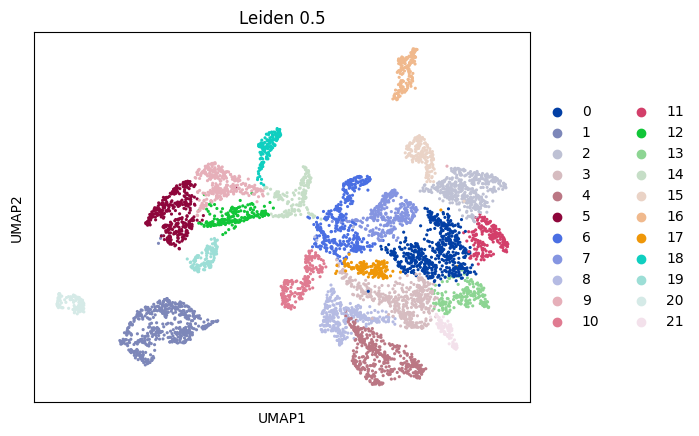

In [11]:
ep.pp.scale_norm(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")